## Time Accounting for the DDF Program
by Melissa Graham, 2021-12-19

#### 1. Time spent so far.

#### 2. Projected total time spent in 21B.
For the CURRENT version of DDF_fixed_scheduler_file.txt, created on 2021-12-22.
In this version, observations of COSMOS have been dropped from 5 exposures per filter per field per night to 3.

#### 3. How the initial DDF plan would have overspent time.
The file OLD_DDF_fixed_scheduler_file.txt was created at the start of 2021B.
It assumed 10 hours/night when the truth is 8.3 hours/night, and thus was oversubscribed.
It is also different from the CURRENT version in that the CURRENT version has had the first four epochs on the COSMOS field removed in order to avoid an oversubscription problem caused by assuming 10 hour nights.

There is also an OLD2_DDF_fixed_scheduler_file.txt. This is similar to the current version except it has the full 5 exposures per field per filter for COSMOS.

In [2]:
import glob,os
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

In [3]:
### To put a line for today on the plots below, define today's date.
# today = '2021-11-08'
# today = '2021-12-22'
today = '2022-01-23'

today_mjd = Time(today+'T00:00:00.00', format='isot', scale='utc').mjd

In [4]:
### Define the number of hours per night to assume
hours_per_night = 8.3

### 1. Time spent so far.

In [5]:
### Get the list of all the qcinv files to date
qcinv_fnms = glob.glob( '../../../2021B/*/*.qcinv')

### Generate the list of dates and mjds
temp = []
for qfnm in qcinv_fnms:
    t1 = qfnm.split('/')[4]
    t2 = t1.split('.')[0]
    temp.append( t2[0:4]+'-'+t2[4:6]+'-'+t2[6:8] )
    del t1,t2
qcinv_dates = np.sort( np.asarray( temp, dtype='str' ) )
del temp

temp = []
for qdate in qcinv_dates:
    temp.append( Time(qdate+'T00:00:00.00', format='isot', scale='utc').mjd )
qcinv_mjds = np.asarray( temp, dtype='float' )
del temp

for q in range(len(qcinv_dates)):
    print(qcinv_dates[q],qcinv_mjds[q])

2021-09-16 59473.0
2021-09-17 59474.0
2021-09-19 59476.0
2021-09-20 59477.0
2021-09-22 59479.0
2021-09-28 59485.0
2021-10-04 59491.0
2021-10-07 59494.0
2021-10-10 59497.0
2021-10-13 59500.0
2021-10-16 59503.0
2021-10-17 59504.0
2021-10-19 59506.0
2021-10-20 59507.0
2021-10-22 59509.0
2021-10-23 59510.0
2021-10-24 59511.0
2021-10-28 59515.0
2021-11-03 59521.0
2021-11-06 59524.0
2021-11-13 59531.0
2021-11-14 59532.0
2021-11-15 59533.0
2021-11-16 59534.0
2021-11-17 59535.0
2021-11-18 59536.0
2021-11-21 59539.0
2021-11-27 59545.0
2021-11-30 59548.0
2021-12-03 59551.0
2021-12-06 59554.0
2021-12-09 59557.0
2021-12-12 59560.0
2021-12-15 59563.0
2021-12-18 59566.0
2021-12-21 59569.0
2021-12-22 59570.0
2021-12-23 59571.0
2022-01-02 59581.0
2022-01-05 59584.0
2022-01-08 59587.0
2022-01-12 59591.0
2022-01-15 59594.0
2022-01-20 59599.0
2022-01-21 59600.0
2022-01-22 59601.0
2022-01-23 59602.0


In [6]:
### Generate arrays of the observations

### Set true if you want debugging output
verbose_level_1 = False
verbose_level_2 = False

temp1 = []
temp2 = []
temp3 = []
temp4 = []

for q,qfnm in enumerate(qcinv_fnms):
    f = open(qfnm)
    lines = f.readlines()
    last_target = 'other'
    start_time = '-:-'
    end_time = '-:-'
    for l,line in enumerate(lines):
        if (line[0:1] != '#'):

            ### Check if this line was a DDF observation
            tx_EL = line.find('ELAIS')
            tx_CO = line.find('COSMOS')
            tx_DE = line.find('DECaPS-East')
            tx_DW = line.find('DECaPS-West')
            if verbose_level_2 == True:
                print(last_target, tx_EL, tx_CO, tx_DE, tx_DW, start_time, end_time)

            ### If this line is a change in field, we now know the end time of a sequence
            if (line[0:1] != 'M') & (line[0:1] != 'p'):
                useline = line
            else:
                useline = lines[l-1] # this will only cause the loss of ~1 minute from accounting
            if (last_target == 'ELAIS') & (tx_EL < 0):
                end_time = useline.split()[3]
            if (last_target == 'COSMOS') & (tx_CO < 0):
                end_time = useline.split()[3]
            if (last_target == 'DECaPS-East') & (tx_DE < 0):
                end_time = useline.split()[3]
            if (last_target == 'DECaPS-West') & (tx_DW < 0):
                end_time = useline.split()[3]
            del useline

            ### If a sequence has ended, append it to our list of observations
            if end_time != '-:-':
                temp1.append(qcinv_dates[q])
                temp2.append(qcinv_mjds[q])
                temp3.append(last_target)
                start = float(start_time.split(':')[0]) + float(start_time.split(':')[1])/60.0
                end   = float(end_time.split(':')[0]) + float(end_time.split(':')[1])/60.0
                if start > 20.0:
                    start = start - 24.0
                if end > 20.0:
                    end = end - 24.0
                temp4.append( np.round( end - start, 3) )
                if verbose_level_1 == True:
                    print('seq end: ',qcinv_dates[q],qcinv_mjds[q],last_target,np.round( end - start, 3))
                start_time = '-:-'
                end_time = '-:-'
                del start, end

            ### If this sequence was the first on one of our fields, it's a new start time
            if (tx_EL >= 0) & (last_target != 'ELAIS'):
                start_time = line.split()[3]
            if (tx_CO >= 0) & (last_target != 'COSMOS'):
                start_time = line.split()[3]
            if (tx_DE >= 0) & (last_target != 'DECaPS-East'):
                start_time = line.split()[3]
            if (tx_DW >= 0) & (last_target != 'DECaPS-West'):
                start_time = line.split()[3]

            if tx_EL >= 0:
                last_target = 'ELAIS'
            if tx_CO >= 0:
                last_target = 'COSMOS'
            if tx_DE >= 0:
                last_target = 'DECaPS-East'
            if tx_DW >= 0:
                last_target = 'DECaPS-West'
            if (tx_EL < 0) & (tx_CO < 0) & (tx_DE < 0) & (tx_DW < 0):
                last_target = 'other'

            del tx_EL, tx_CO, tx_DE, tx_DW
    
    f.close()
    del f, lines, last_target, start_time, end_time

obs_date  = np.asarray( temp1, dtype='str' )
obs_mjd   = np.asarray( temp2, dtype='float' )
obs_fname = np.asarray( temp3, dtype='str' )
obs_dtime = np.asarray( temp4, dtype='float' )

del temp1,temp2,temp3,temp4
del verbose_level_1, verbose_level_2

In [7]:
### Generate a cumulative time
temp = []
for o,dtime in enumerate(obs_dtime):
    if o == 0:
        temp.append( dtime )
    else:
        temp.append( temp[o-1] + dtime )
obs_ctime = np.asarray( temp, dtype='float' )
del temp

In [8]:
### Print all sequences and their cumulative time in hours
# for o,date in enumerate(obs_date):
#     print('%10s  %7.1f  %11s  %5.2f  %5.2f' % \
#           (obs_date[o], obs_mjd[o], obs_fname[o], obs_dtime[o], obs_ctime[o]) )

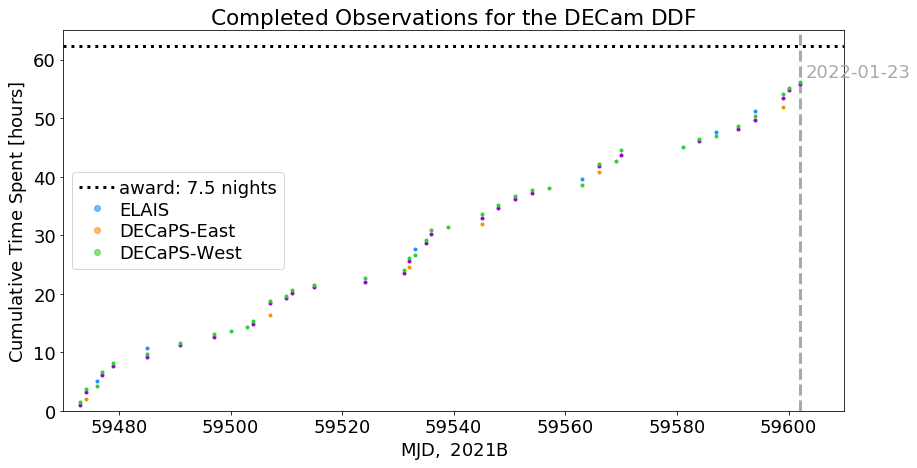

In [9]:
### Plot the cumulative time as a function of MJD over 2021B

fig = plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':18})

### horizontal dotted line at the DDF time awarded
plt.axhline( 7.5*hours_per_night, ls='dotted', lw=3, alpha=1, color='black', label='award: 7.5 nights' )

### verticle dashed line at "today"
plt.axvline( today_mjd, ls='dashed', lw=3, alpha=1, color='darkgrey')
plt.text( today_mjd+1, 57, today, color='darkgrey')

for o in range(len(obs_mjd)):
    if obs_fname[o] == 'ELAIS':
        point_color = 'darkviolet'
    if obs_fname[o] == 'COSMOS':
        point_color = 'dodgerblue'
    if obs_fname[o] == 'DECaPS-East':
        point_color = 'darkorange'
    if obs_fname[o] == 'DECaPS-West':
        point_color = 'limegreen'
    plt.plot( obs_mjd[o], obs_ctime[o], 'o', ms=3, alpha=1, color=point_color )

plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='dodgerblue', label='ELAIS' )
# plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkviolet', label='COSMOS' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkorange', label='DECaPS-East' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='limegreen', label='DECaPS-West' )
    
plt.xlim([59470,59610])
plt.ylim([0,65])
plt.xlabel(r'${\rm MJD,\ 2021B}$',fontsize=18)
plt.ylabel(r'${\rm Cumulative\ Time\ Spent\ [hours]}$',fontsize=18)
plt.title(r'${\rm Completed\ Observations\ for\ the\ DECam\ DDF}$')
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.show()

### 2. Projected total time spent in 21B.
"Current" version of DDF_fixed_scheduler_file.txt was made on 2021-11-08.

In [10]:
### Read in data from DDF_fixed_scheduler_file.txt
fsf_date  = np.loadtxt( 'DDF_fixed_scheduler_file.txt', dtype='str', usecols={0} )
fsf_seqid = np.loadtxt( 'DDF_fixed_scheduler_file.txt', dtype='str', usecols={1} )
fsf_dtime = np.loadtxt( 'DDF_fixed_scheduler_file.txt', dtype='float', usecols={4} )

### Grab just the field name from each of the sequence ids
temp = []
for fid in fsf_seqid:
    temp.append( fid.split('-')[0] )
fsf_fname = np.asarray( temp, dtype='str' )
del temp

### Convert the dates to MJD
temp = []
for fdate in fsf_date:
    temp.append( Time(fdate+'T00:00:00.00', format='isot', scale='utc').mjd )
fsf_mjd = np.asarray( temp, dtype='float' )
del temp

In [11]:
print( 'Total planned time is %5.2f hours' % np.sum(fsf_dtime) )
print( 'Assuming %3.1f hours a night, that is %4.2f nights.' % \
      (hours_per_night,(np.sum(fsf_dtime)/hours_per_night)) )
print( 'And the DDF was awarded 7.5 nights.')

Total planned time is 57.14 hours
Assuming 8.3 hours a night, that is 6.88 nights.
And the DDF was awarded 7.5 nights.


In [12]:
### Generate array of cumulative time spent, if the plan is followed
temp = []
for f,fdt in enumerate(fsf_dtime):
    if f == 0:
        temp.append( fsf_dtime[f] )
    else:
        temp.append( temp[f-1]+fsf_dtime[f] )
fsf_dtimeC = np.asarray( temp, dtype='float' )
del temp

In [13]:
### Generate array of IDEAL cumulative time spent
###  which is the total time divided equally between epochs

### Generate array of unique dates (i.e., epochs)
udates = np.unique( fsf_date )
temp = []
for udate in udates:
    temp.append( Time(udate+'T00:00:00.00', format='isot', scale='utc').mjd )
udates_mjd = np.asarray( temp, dtype='float' )
del temp

### Calculate the ideal number of hours per night,
###  using hours_per_night hours per night and the assigned 7.5 nights.
awarded_hours = 7.5 * hours_per_night
number_of_epochs = float( len(udates) )
ideal_hours_per_epoch = awarded_hours / number_of_epochs
str_ihpe = str( np.round(ideal_hours_per_epoch,1) )

### Generate the array of cumulative time spent, in the ideal case
temp = []
for u,udate in enumerate(udates):
    if u == 0:
        temp.append( ideal_hours_per_epoch )
    else:
        temp.append( temp[u-1] + ideal_hours_per_epoch )
udates_ideal_ctime = np.asarray( temp, dtype='float' )
del temp

print('Number of epochs = ',len(udates))

Number of epochs =  44


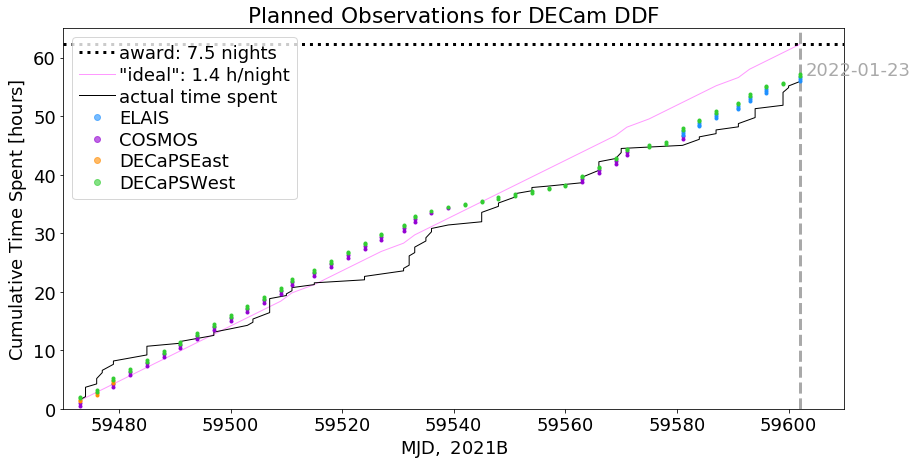

In [14]:
### Plot the cumulative time as a function of MJD over 2021B

fig = plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':18})

### horizontal dotted line at the DDF time awarded
plt.axhline( 7.5*hours_per_night, ls='dotted', lw=3, alpha=1, color='black', label='award: 7.5 nights' )

### verticle dashed line at "today"
plt.axvline( today_mjd, ls='dashed', lw=3, alpha=1, color='darkgrey')
plt.text( today_mjd+1, 57, today, color='darkgrey')

### plot the cumulative time if we divided the DDF time evenly over all nights
plt.plot( udates_mjd, udates_ideal_ctime, ls='solid', lw=1, alpha=0.4, color='magenta', \
         label='"ideal": '+str_ihpe+' h/night')

### plot the actual cumulative time spent so far
plt.plot( obs_mjd, obs_ctime, lw=1, alpha=1, color='black', label='actual time spent')
# plt.plot( obs_mjd, obs_ctime, 'o', ms=2, alpha=1, color='black', label='actual time spent')

for f in range(len(fsf_mjd)):
    if fsf_fname[f] == 'ELAIS':
        point_color = 'darkviolet'
    if fsf_fname[f] == 'COSMOS':
        point_color = 'dodgerblue'
    if fsf_fname[f] == 'DECaPSEast':
        point_color = 'darkorange'
    if fsf_fname[f] == 'DECaPSWest':
        point_color = 'limegreen'
    plt.plot( fsf_mjd[f], fsf_dtimeC[f], 'o', ms=3, alpha=1, color=point_color )

plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='dodgerblue', label='ELAIS' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkviolet', label='COSMOS' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkorange', label='DECaPSEast' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='limegreen', label='DECaPSWest' )
    
plt.xlim([59470,59610])
plt.ylim([0,65])
plt.xlabel(r'${\rm MJD,\ 2021B}$',fontsize=18)
plt.ylabel(r'${\rm Cumulative\ Time\ Spent\ [hours]}$',fontsize=18)
plt.title(r'${\rm Planned\ Observations\ for\ DECam\ DDF}$')
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.show()

#### By comparing this plot with the first plot...
... we can see that the actual time spent (black line) exceeds the planned time (colored points) early in the semester when ELAIS was being used as a filler program during full nights. By comparing with the first plot in this NB, we can also see that DECaPS-East (orange) was done on three extra epochs when it wasn't in the observing plan.

In [15]:
### Clean up
del fsf_date, fsf_seqid, fsf_dtime, fsf_fname, fsf_mjd, fsf_dtimeC
del udates, udates_mjd, udates_ideal_ctime
del awarded_hours, number_of_epochs, ideal_hours_per_epoch, str_ihpe

del obs_date, obs_mjd, obs_fname, obs_dtime, obs_ctime

### 2. Show how the OLD DDF fixed scheduler file would have over-spent for 2021B.
"OLD" version of DDF_fixed_scheduler_file.txt was made at the start of 2021B.

In [16]:
### Read in data from DDF_fixed_scheduler_file.txt
fsf_date  = np.loadtxt( 'OLD_DDF_fixed_scheduler_file.txt', dtype='str', usecols={0} )
fsf_seqid = np.loadtxt( 'OLD_DDF_fixed_scheduler_file.txt', dtype='str', usecols={1} )
fsf_dtime = np.loadtxt( 'OLD_DDF_fixed_scheduler_file.txt', dtype='float', usecols={4} )

### Grab just the field name from each of the sequence ids
temp = []
for fid in fsf_seqid:
    temp.append( fid.split('-')[0] )
fsf_fname = np.asarray( temp, dtype='str' )
del temp

### Convert the dates to MJD
temp = []
for fdate in fsf_date:
    temp.append( Time(fdate+'T00:00:00.00', format='isot', scale='utc').mjd )
fsf_mjd = np.asarray( temp, dtype='float' )
del temp

In [17]:
print( 'Total planned time is %5.2f hours' % np.sum(fsf_dtime) )
print( 'Assuming 10 hours a night, that is %4.2f nights.' % (np.sum(fsf_dtime)/10) )
print( 'But Alfredo said it is %3.1f hours a night, so %4.2f nights.' % \
      (hours_per_night,(np.sum(fsf_dtime)/hours_per_night)) )
print( 'Thus the DDF is over-planned by %4.2f nights, or %4.2f hours.' % \
      ((np.sum(fsf_dtime)/hours_per_night - 7.5),hours_per_night*(np.sum(fsf_dtime)/hours_per_night - 7.5)) )

Total planned time is 68.88 hours
Assuming 10 hours a night, that is 6.89 nights.
But Alfredo said it is 8.3 hours a night, so 8.30 nights.
Thus the DDF is over-planned by 0.80 nights, or 6.63 hours.


In [18]:
### Generate array of cumulative time spent, if the plan is followed
temp = []
for f,fdt in enumerate(fsf_dtime):
    if f == 0:
        temp.append( fsf_dtime[f] )
    else:
        temp.append( temp[f-1]+fsf_dtime[f] )
fsf_dtimeC = np.asarray( temp, dtype='float' )
del temp

In [19]:
### Generate array of IDEAL cumulative time spent
###  which is the total time divided equally between epochs

### Generate array of unique dates (i.e., epochs)
udates = np.unique( fsf_date )
temp = []
for udate in udates:
    temp.append( Time(udate+'T00:00:00.00', format='isot', scale='utc').mjd )
udates_mjd = np.asarray( temp, dtype='float' )
del temp

### Calculate the ideal number of hours per night,
###  using hours_per_night hours per night and the assigned 7.5 nights.
awarded_hours = 7.5 * hours_per_night
number_of_epochs = float( len(udates) )
ideal_hours_per_epoch = awarded_hours / number_of_epochs
str_ihpe = str( np.round(ideal_hours_per_epoch,1) )

### Generate the array of cumulative time spent, in the ideal case
temp = []
for u,udate in enumerate(udates):
    if u == 0:
        temp.append( ideal_hours_per_epoch )
    else:
        temp.append( temp[u-1] + ideal_hours_per_epoch )
udates_ideal_ctime = np.asarray( temp, dtype='float' )
del temp

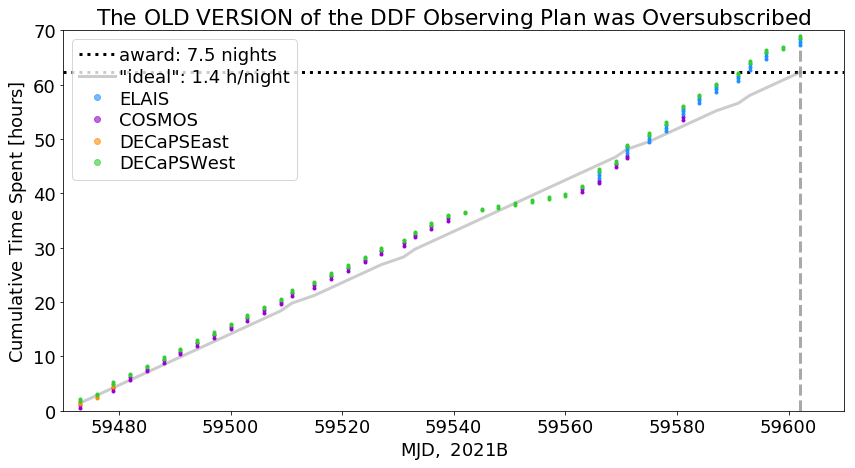

In [20]:
### Plot the cumulative time as a function of MJD over 2021B

fig = plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':18})

### horizontal line at the DDF time awarded
plt.axhline( 7.5*hours_per_night, ls='dotted', lw=3, alpha=1, color='black', label='award: 7.5 nights' )

### verticle line at "today"
plt.axvline( today_mjd, ls='dashed', lw=3, alpha=1, color='darkgrey')
# plt.text( today_mjd+1, 57, today, color='darkgrey')

### plot the cumulative time if we divided the DDF time evenly over all nights
plt.plot( udates_mjd, udates_ideal_ctime, ls='solid', lw=3, alpha=0.4, color='grey', \
         label='"ideal": '+str_ihpe+' h/night')

for f in range(len(fsf_mjd)):
    if fsf_fname[f] == 'ELAIS':
        point_color = 'darkviolet'
    if fsf_fname[f] == 'COSMOS':
        point_color = 'dodgerblue'
    if fsf_fname[f] == 'DECaPSEast':
        point_color = 'darkorange'
    if fsf_fname[f] == 'DECaPSWest':
        point_color = 'limegreen'
    plt.plot( fsf_mjd[f], fsf_dtimeC[f], 'o', ms=3, alpha=1, color=point_color )

plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='dodgerblue', label='ELAIS' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkviolet', label='COSMOS' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='darkorange', label='DECaPSEast' )
plt.plot( -99,-99, 'o', ms=6, alpha=0.6, color='limegreen', label='DECaPSWest' )
    
plt.xlim([59470,59610])
plt.ylim([0,70])
plt.xlabel(r'${\rm MJD,\ 2021B}$',fontsize=18)
plt.ylabel(r'${\rm Cumulative\ Time\ Spent\ [hours]}$',fontsize=18)
plt.title(r'${\rm The\ OLD\ VERSION\ of\ the\ DDF\ Observing\ Plan\ was\ Oversubscribed}$')
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.show()

The plot above shows that the COSMOS field was driving the DDF over the time awarded.

In [21]:
### Clean up
del fsf_date, fsf_seqid, fsf_dtime, fsf_fname, fsf_mjd, fsf_dtimeC
del udates, udates_mjd, udates_ideal_ctime
del awarded_hours, number_of_epochs, ideal_hours_per_epoch, str_ihpe